In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint
import numpy as np
from deep_tools.training_callbacks import *
# fix random seed for reproducibility
np.random.seed(7)

Using TensorFlow backend.


In [2]:
# create model
model = Sequential()
model.add(Dense(2048, input_dim=2048, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
__________

In [4]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
acc_callback = TrainingAccuracyPlotter()
loss_plotter = TrainingLossPlotter()
time_plotter = TimeLogCallback()
checkpoint = checkpoint_classification_callback(
    checkpoint_path="/home/wc-gpu/MasterThesis/models/research/object_detection/box_classification_checkpoint", 
    monitor='val_acc',
    save_best_only=False)
callbacks = [time_plotter, acc_callback]

In [6]:
data = np.load("/home/wc-gpu/MasterThesis/session_data/dataset.pkl")

In [7]:
x = data[0]
y = data[1]
len(np.where(y==1)[0])

1895

In [8]:
mn = np.mean(x, axis=0).shape

In [9]:
std = np.std(x, axis=0)

In [10]:
x = (x - mn)/std

In [11]:
negatives = np.where(y == 0)[0]
negatives = negatives[np.random.choice(negatives.shape[0], 1895, replace=False)]
positives = np.where(y==1)[0]
idxs = np.concatenate([negatives, positives])
np.random.shuffle(idxs)
# x[np.where(x == 0)[0]] = .1
x = x[idxs]
y = y[idxs]

In [12]:
# for i in range(x.shape[0]) :
# #     print(x[i].mean(axis=0), min(x[i]), max(x[i]))
    
#     x[i] = (x[i] - x[i].mean(axis=0)) / x[i].std(axis=0)
    
# #     print(feat)


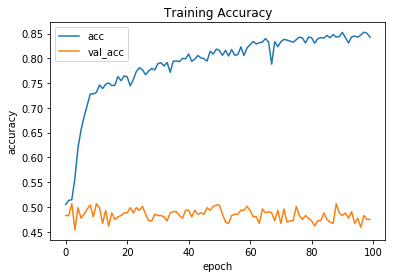

In [13]:
model.fit(x=x,
    y=y, 
    batch_size=32,
    epochs=100,
    verbose=1, 
    callbacks=callbacks,
    validation_split=0.1, 
    validation_data=None, 
    shuffle=True, 
    class_weight=None, 
    sample_weight=None, 
    initial_epoch=0)


In [14]:
a = model.predict(x)

In [15]:

len(np.where(a>0.5)[0])

1912

In [16]:
len(x)

3790

In [17]:
test_session_path = "/home/wc-gpu/MasterThesis/session_data/122923_testing"